# Mental Health in Tech (2016) Visualization and Modeling

![Mental Health](https://www.planstreetinc.com/wp-content/uploads/2021/07/what-is-mental-health.png)
    
## Introduction

Because mental health is a very important matter, we decided to analyze the data from the [2016 Mental Health in Tech Survey](https://www.kaggle.com/datasets/osmi/mental-health-in-tech-2016) to see if we could find any interesting insights. We also wanted to see if we could build a model to predict whether or not a person would seek treatment for a mental health condition based on the data provided.

## I. Data Cleaning and Preprocessing

This section will cover the data cleaning and preprocessing steps we took to prepare the data for analysis and modeling.
The `OSMI Mental Health in Tech Survey 2016` contains 1467 rows and 63 columns. A lot of it misses values, so we will have to clean it up before we can use it for analysis and modeling.

Summary of the data cleaning and preprocessing steps:

1. -

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import os
from sklearn.model_selection import train_test_split

import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv('survey_2016.csv')

In [3]:
df.head()

,Are you self-employed?,How many employees does your company or organization have?,Is your employer primarily a tech company/organization?,Is your primary role within your company related to tech/IT?,Does your employer provide mental health benefits as part of healthcare coverage?,Do you know the options for mental health care available under your employer-provided coverage?,"Has your employer ever formally discussed mental health (for example, as part of a wellness campaign or other official communication)?",Does your employer offer resources to learn more about mental health concerns and options for seeking help?,Is your anonymity protected if you choose to take advantage of mental health or substance abuse treatment resources provided by your employer?,"If a mental health issue prompted you to request a medical leave from work, asking for that leave would be:",...,"If you have a mental health issue, do you feel that it interferes with your work when being treated effectively?","If you have a mental health issue, do you feel that it interferes with your work when NOT being treated effectively?",What is your age?,What is your gender?,What country do you live in?,What US state or territory do you live in?,What country do you work in?,What US state or territory do you work in?,Which of the following best describes your work position?,Do you work remotely?
0,0,26-100,1.0,NaN,Not eligible for coverage / N/A,NaN,No,No,I don't know,Very easy,...,Not applicable to me,Not applicable to me,39,Male,United Kingdom,NaN,United Kingdom,NaN,Back-end Developer,Sometimes
1,0,6-25,1.0,NaN,No,Yes,Yes,Yes,Yes,Somewhat easy,...,Rarely,Sometimes,29,male,United States of America,Illinois,United States of America,Illinois,Back-end Developer|Front-end Developer,Never
2,0,6-25,1.0,NaN,No,NaN,No,No,I don't know,Neither easy nor difficult,...,Not applicable to me,Not applicable to me,38,Male,United Kingdom,NaN,United Kingdom,NaN,Back-end Developer,Always
3,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,Sometimes,Sometimes,43,male,United Kingdom,NaN,United Kingdom,NaN,Supervisor/Team Lead,Sometimes
4,0,6-25,0.0,1.0,Yes,Yes,No,No,No,Neither easy nor difficult,...,Sometimes,Sometimes,43,Female,United States of America,Illinois,United States of America,Illinois,Executive Leadership|Supervisor/Team Lead|Dev ...,Sometimes


In [4]:
df.describe()

,Are you self-employed?,Is your employer primarily a tech company/organization?,Is your primary role within your company related to tech/IT?,Do you have medical coverage (private insurance or state-provided) which includes treatment of mental health issues?,Do you have previous employers?,Have you ever sought treatment for a mental health issue from a mental health professional?,What is your age?
count,1433.000000,1146.000000,263.000000,287.000000,1433.000000,1433.000000,1433.000000
mean,0.200279,0.770506,0.942966,0.644599,0.882066,0.585485,34.286113
std,0.400349,0.420691,0.232350,0.479471,0.322643,0.492810,11.290931
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000
25%,0.000000,1.000000,1.000000,0.000000,1.000000,0.000000,28.000000
50%,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,33.000000
75%,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,39.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,323.000000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1433 entries, 0 to 1432
Data columns (total 63 columns):
 #   Column                                                                                                                                                                            Non-Null Count  Dtype  
---  ------                                                                                                                                                                            --------------  -----  
 0   Are you self-employed?                                                                                                                                                            1433 non-null   int64  
 1   How many employees does your company or organization have?                                                                                                                        1146 non-null   object 
 2   Is your employer primarily a tech company/organization?     

In [6]:
new_columns = [
    "self_employed",  # Are you self-employed?
    "company_size",  # How many employees does your company or organization have?
    "employer_is_tech",  # Is your employer primarily a tech company/organization?
    "role_related_to_tech",  # Is your primary role within your company related to tech/IT?
    "employer_mental_health_benefits",  # Does your employer provide mental health benefits as part of healthcare coverage?
    "awareness_of_mental_health_coverage",  # Do you know the options for mental health care available under your employer-provided coverage?
    "employer_discussion_on_mental_health",  # Has your employer ever formally discussed mental health (for example, as part of a wellness campaign or other official communication)?
    "employer_mental_health_resources",  # Does your employer offer resources to learn more about mental health concerns and options for seeking help?
    "anonymity_protection",  # Is your anonymity protected if you choose to take advantage of mental health or substance abuse treatment resources provided by your employer?
    "ease_of_medical_leave_for_mental_health",  # If a mental health issue prompted you to request a medical leave from work, asking for that leave would be:
    "employer_react_negative_mental",  # Do you think that discussing a mental health disorder with your employer would have negative consequences?
    "employer_react_negative_physical",  # Do you think that discussing a physical health issue with your employer would have negative consequences?
    "comfortable_discussing_mental_health_coworkers",  # Would you feel comfortable discussing a mental health disorder with your coworkers?
    "comfortable_discussing_mental_health_supervisor",  # Would you feel comfortable discussing a mental health disorder with your direct supervisor(s)?
    "employer_seriousness_mental_vs_physical",  # Do you feel that your employer takes mental health as seriously as physical health?
    "observed_consequences_mental_health",  # Have you heard of or observed negative consequences for co-workers who have been open about mental health issues in your workplace?
    "personal_health_coverage_includes_mental",  # Do you have medical coverage (private insurance or state-provided) which includes treatment of mental health issues?
    "know_mental_health_resources",  # Do you know local or online resources to seek help for a mental health disorder?
    "disclosure_to_clients",  # If you have been diagnosed or treated for a mental health disorder, do you ever reveal this to clients or business contacts?
    "client_reaction_to_disclosure",  # If you have revealed a mental health issue to a client or business contact, do you believe this has impacted you negatively?
    "disclosure_to_coworkers",  # If you have been diagnosed or treated for a mental health disorder, do you ever reveal this to coworkers or employees?
    "coworker_reaction_to_disclosure",  # If you have revealed a mental health issue to a coworker or employee, do you believe this has impacted you negatively?
    "mental_health_impact_on_productivity",  # Do you believe your productivity is ever affected by a mental health issue?
    "work_time_affected_by_mental_health",  # If yes, what percentage of your work time (time performing primary or secondary job functions) is affected by a mental health issue?
    "had_previous_employers",  # Do you have previous employers?
    "previous_employer_mental_health_benefits",  # Have your previous employers provided mental health benefits?
    "aware_of_previous_employer_mental_health_care",  # Were you aware of the options for mental health care provided by your previous employers?
    "previous_employer_discussion_mental_health",  # Did your previous employers ever formally discuss mental health (as part of a wellness campaign or other official communication)?
    "previous_employer_mental_health_resources",  # Did your previous employers provide resources to learn more about mental health issues and how to seek help?
    "anonymity_protection_previous_employer",  # Was your anonymity protected if you chose to take advantage of mental health or substance abuse treatment resources with previous employers?
    "negative_consequences_discussing_mental_health_previous_employer",  # Do you think that discussing a mental health disorder with previous employers would have negative consequences?
    "negative_consequences_discussing_physical_health_previous_employer",  # Do you think that discussing a physical health issue with previous employers would have negative consequences?
    "willing_to_discuss_mental_health_with_previous_coworkers",  # Would you have been willing to discuss a mental health issue with your previous co-workers?
    "willing_to_discuss_mental_health_with_previous_supervisor",  # Would you have been willing to discuss a mental health issue with your direct supervisor(s)?
    "previous_employer_seriousness_mental_vs_physical",  # Did you feel that your previous employers took mental health as seriously as physical health?
    "observed_consequences_mental_health_previous_workplace",  # Did you hear of or observe negative consequences for co-workers with mental health issues in your previous workplaces?
    "discuss_physical_health_in_interview",  # Would you be willing to bring up a physical health issue with a potential employer in an interview?
    "reason_for_discussing_physical_health",  # Why or why not?
    "discuss_mental_health_in_interview",  # Would you bring up a mental health issue with a potential employer in an interview?
    "reason_for_discussing_mental_health",  # Why or why not?.1
    "identified_as_mental_health_risk_to_career",  # Do you feel that being identified as a person with a mental health issue would hurt your career?
    "coworker_view_on_mental_health_disclosure",  # Do you think that team members/co-workers would view you more negatively if they knew you suffered from a mental health issue?
    "willingness_to_share_mental_health_with_friends_family",  # How willing would you be to share with friends and family that you have a mental illness?
    "observed_bad_handling_of_mental_health",  # Have you observed or experienced an unsupportive or badly handled response to a mental health issue in your current or previous workplace?
    "impact_of_others_mental_health_disclosure_on_self",  # Have your observations of how another individual who discussed a mental health disorder made you less likely to reveal a mental health issue yourself in your current workplace?
    "family_history_of_mental_illness",  # Do you have a family history of mental illness?
    "past_mental_health_disorder",  # Have you had a mental health disorder in the past?
    "current_mental_health_disorder",  # Do you currently have a mental health disorder?
    "diagnosed_conditions",  # If yes, what condition(s) have you been diagnosed with?
    "suspected_conditions",  # If maybe, what condition(s) do you believe you have?
    "diagnosed_by_professional",  # Have you been diagnosed with a mental health condition by a medical professional?
    "diagnosed_conditions_by_professional",  # If so, what condition(s) were you diagnosed with?
    "sought_mental_health_treatment",  # Have you ever sought treatment for a mental health issue from a mental health professional?
    "work_interference_when_treated",  # If you have a mental health issue, do you feel that it interferes with your work when being treated effectively?
    "work_interference_when_not_treated",  # If you have a mental health issue, do you feel that it interferes with your work when NOT being treated effectively?
    "age",  # What is your age?
    "gender",  # What is your gender?
    "country_of_residence",  # What country do you live in?
    "us_state_or_territory_of_residence",  # What US state or territory do you live in?
    "country_of_work",  # What country do you work in?
    "us_state_or_territory_of_work",  # What US state or territory do you work in?
    "work_position_description",  # Which of the following best describes your work position?
    "remote_work_status"  # Do you work remotely?
]

In [7]:
df.columns = new_columns

In [8]:
df['gender'].unique()

array(['Male', 'male', 'Male ', 'Female', 'M', 'female', 'm',
       'I identify as female.', 'female ', 'Bigender', 'non-binary',
       'Female assigned at birth ', 'F', 'Woman', 'man', 'fm', 'f',
       'Cis female ', 'Transitioned, M2F', 'Genderfluid (born female)',
       'Other/Transfeminine', 'Female or Multi-Gender Femme', 'Female ',
       'woman', 'female/woman', 'Cis male', 'Male.', 'Androgynous',
       'male 9:1 female, roughly', nan, 'Male (cis)', 'Other',
       'nb masculine', 'Cisgender Female', 'Man', 'Sex is male',
       'none of your business', 'genderqueer', 'cis male', 'Human',
       'Genderfluid', 'Enby', 'Malr', 'genderqueer woman', 'mtf', 'Queer',
       'Agender', 'Dude', 'Fluid',
       "I'm a man why didn't you make this a drop down question. You should of asked sex? And I would of answered yes please. Seriously how much text can this take? ",
       'mail', 'M|', 'Male/genderqueer', 'fem', 'Nonbinary', 'male ',
       'human', 'Female (props for making th

In [9]:
df['gender'].replace(to_replace=['Male', 'male', 'Male ', 'M', 'm',
       'man', 'Cis male', 'Male.', 'male 9:1 female, roughly', 'Male (cis)', 'Man', 'Sex is male',
       'cis male', 'Malr', 'Dude', "I'm a man why didn't you make this a drop down question. You should of asked sex? And I would of answered yes please. Seriously how much text can this take? ",
       'mail', 'M|', 'Male/genderqueer', 'male ',
       'Cis Male', 'Male (trans, FtM)',
       'cisdude', 'cis man', 'MALE'], value = 1, inplace = True)


df['gender'].replace(to_replace=['Female', 'female', 'I identify as female.', 'female ',
       'Female assigned at birth ', 'F', 'Woman', 'fm', 'f', 'Cis female ', 'Transitioned, M2F',
       'Genderfluid (born female)', 'Female or Multi-Gender Femme', 'Female ', 'woman', 'female/woman',
       'Cisgender Female', 'fem', 'Female (props for making this a freeform field, though)',
       ' Female', 'Cis-woman', 'female-bodied; no feelings about gender',
       'AFAB'], value = 2, inplace = True)

df['gender'].replace(to_replace = ['Bigender', 'non-binary', 'Other/Transfeminine',
       'Androgynous', 'Other', 'nb masculine',
       'none of your business', 'genderqueer', 'Human', 'Genderfluid',
       'Enby', 'genderqueer woman', 'mtf', 'Queer', 'Agender', 'Fluid',
       'Nonbinary', 'human', 'Unicorn', 'Genderqueer',
       'Genderflux demi-girl', 'Transgender woman'], value = 3, inplace = True)

df['gender'].dropna(inplace = True)

<Axes: xlabel='age'>

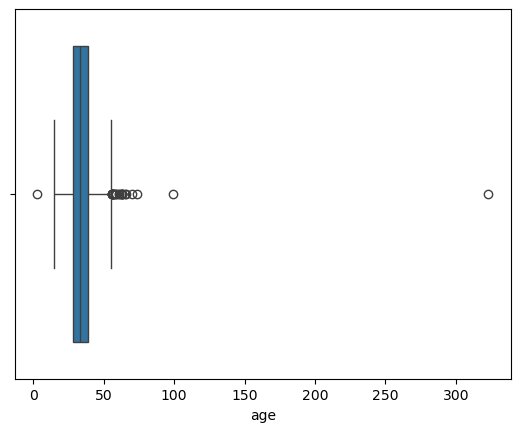

In [10]:
sns.boxplot(x=df['age'])

In [11]:
df = df.drop(df[df.age < 18].index)
df = df.drop(df[df.age > 95].index)

<Axes: >

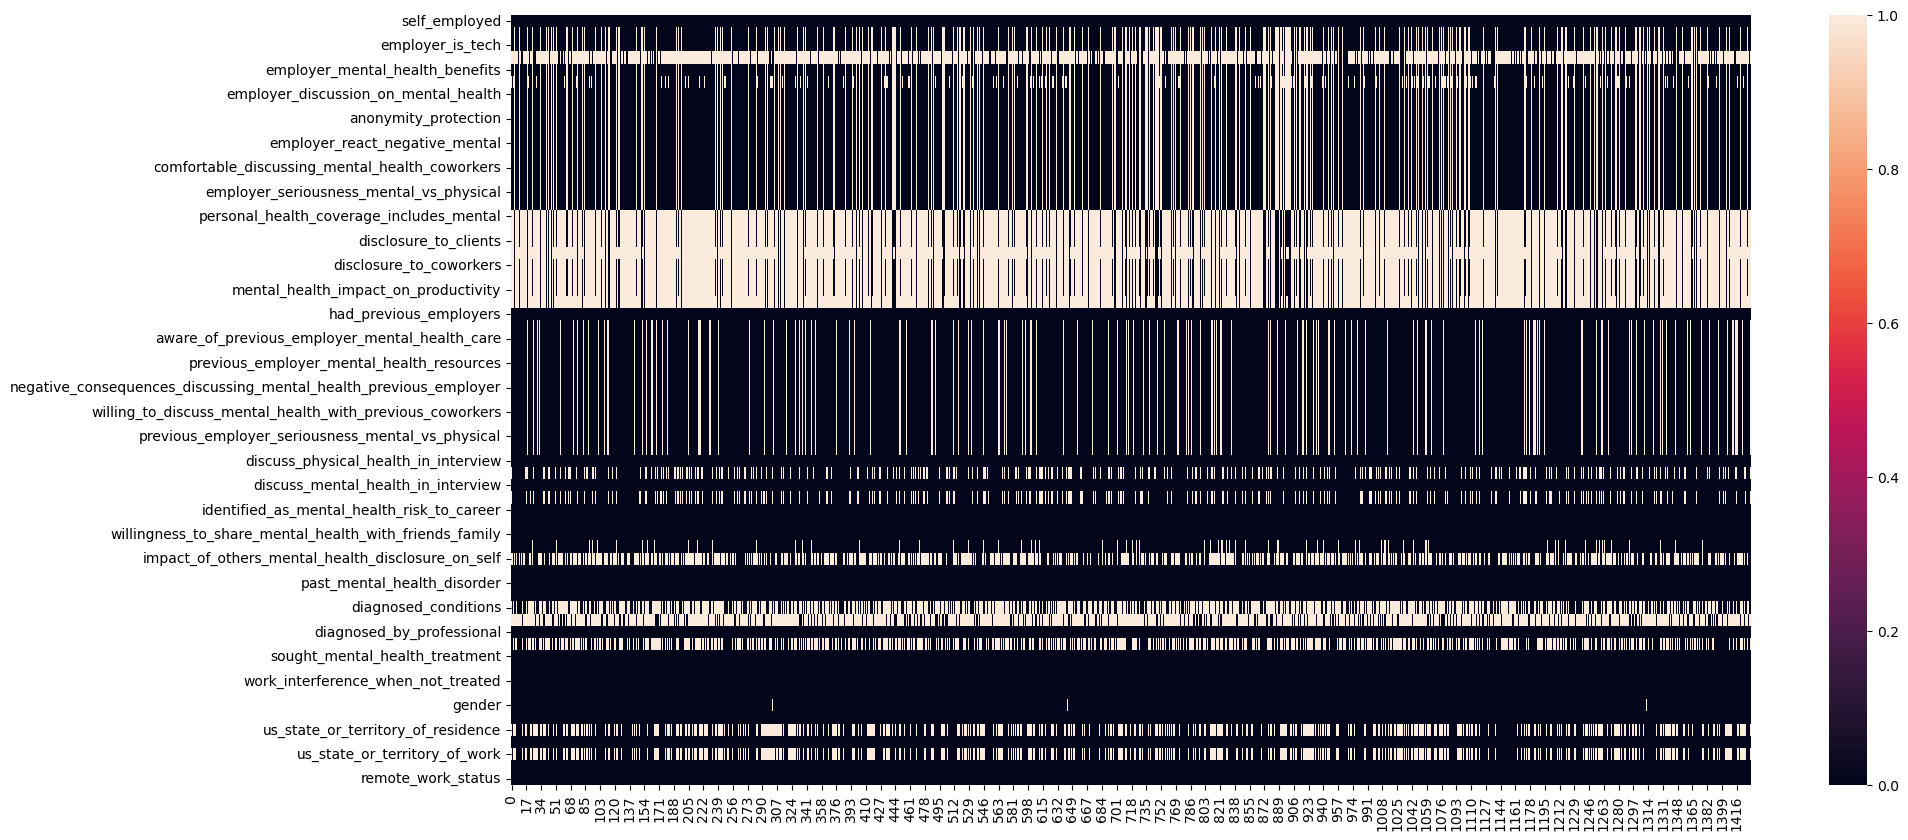

In [12]:
plt.figure(figsize=(20,10))
sns.heatmap(data = df.isna().T)

In [13]:
# columns_to_keep = [
#     "self_employed",
#     "employer_is_tech",
#     "role_related_to_tech",
#     "employer_mental_health_benefits",
#     "employer_mental_health_resources",
#     "anonymity_protection",
#     "ease_of_medical_leave_for_mental_health",
#     "employer_seriousness_mental_vs_physical",
#     "identified_as_mental_health_risk_to_career",
#     "willingness_to_share_mental_health_with_friends_family",
#     "observed_bad_handling_of_mental_health",
#     "family_history_of_mental_illness",
#     "past_mental_health_disorder",
#     "current_mental_health_disorder",
#     "diagnosed_conditions",
#     "suspected_conditions",
#     "diagnosed_by_professional",
#     "diagnosed_conditions_by_professional",
#     "sought_mental_health_treatment",
#     "work_interference_when_treated",
#     "work_interference_when_not_treated",
#     "age",
#     "gender",
#     "country_of_residence",
#     "country_of_work",
#     "work_position_description"
# ]

new_df = df

In [14]:
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(missing_values=np.nan, strategy='most_frequent')
imputer.fit(new_df)
survey_df = pd.DataFrame(imputer.transform(new_df), columns=new_df.columns)

In [15]:
from sklearn.preprocessing import LabelEncoder

columns_to_not_encode = ['age']

survey_df['age'] = survey_df['age'].astype('int64')
data_to_encode = survey_df[survey_df.columns.difference(columns_to_not_encode)]
data_to_not_encode = survey_df[columns_to_not_encode]

def label_encode(data):
    cat_columns = list(data.select_dtypes(include=['category', 'object']))
    le = LabelEncoder()

    for col in cat_columns:
        # Fill NaN with a placeholder string, if NaN values exist
        data[col] = data[col].fillna('Missing')
        data[col] = le.fit_transform(data[col])

    return data

data_to_encode = label_encode(data_to_encode)

survey_prepared_df = pd.concat([data_to_encode, data_to_not_encode], axis=1, sort=False)
survey_prepared_df.head()

C:\Users\stanb\AppData\Local\Temp\ipykernel_18532\37482540.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[col] = data[col].fillna('Missing')
C:\Users\stanb\AppData\Local\Temp\ipykernel_18532\37482540.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[col] = le.fit_transform(data[col])
C:\Users\stanb\AppData\Local\Temp\ipykernel_18532\37482540.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value in

,anonymity_protection,anonymity_protection_previous_employer,aware_of_previous_employer_mental_health_care,awareness_of_mental_health_coverage,client_reaction_to_disclosure,comfortable_discussing_mental_health_coworkers,comfortable_discussing_mental_health_supervisor,company_size,country_of_residence,country_of_work,...,us_state_or_territory_of_residence,us_state_or_territory_of_work,willing_to_discuss_mental_health_with_previous_coworkers,willing_to_discuss_mental_health_with_previous_supervisor,willingness_to_share_mental_health_with_friends_family,work_interference_when_not_treated,work_interference_when_treated,work_position_description,work_time_affected_by_mental_health,age
0,0,0,1,1,0,0,2,2,49,49,...,3,3,1,2,4,1,1,0,0,39
1,2,3,0,2,0,0,2,4,50,50,...,11,12,0,2,4,4,3,8,0,29
2,0,0,1,1,0,0,0,4,49,49,...,3,3,1,0,4,1,1,0,0,38
3,0,0,1,1,0,0,2,2,49,49,...,3,3,1,2,0,4,4,205,0,43
4,1,0,1,2,0,0,1,4,50,50,...,11,12,0,2,4,4,4,87,0,43


In [16]:
# Only keep the countries: United States of America, United Kingdom, Netherlands, Germany and Australia
countries_to_keep = ['United States of America', 'United Kingdom', 'Netherlands', 'Germany', 'Australia']

survey_df = survey_df[survey_df['country_of_residence'].isin(countries_to_keep)]
survey_df = survey_df[survey_df['country_of_work'].isin(countries_to_keep)]

## II. Visualization and Analysis

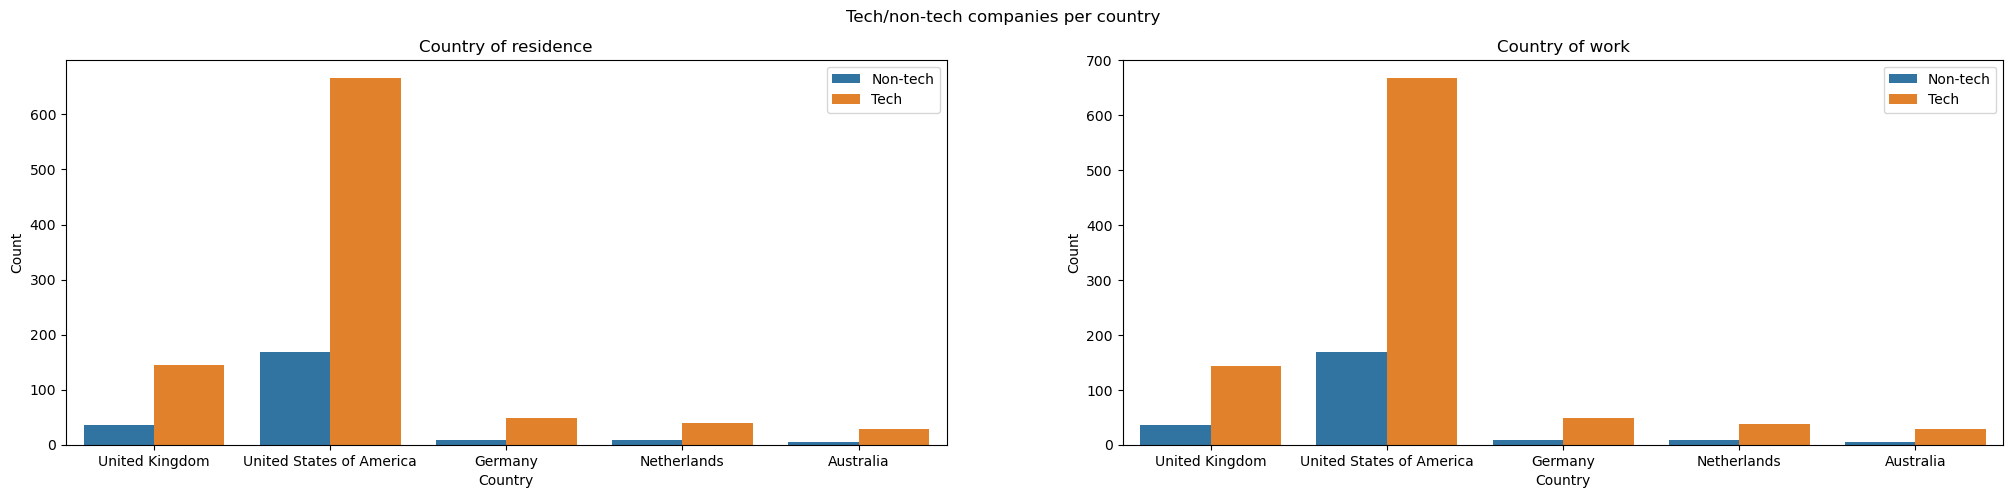

<Figure size 1600x400 with 0 Axes>

In [17]:
# Plot tech/non-tech companies per country
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(20,10))
plt.figure(figsize=(16,4))
fig.set_figheight(5)
fig.set_figwidth(25)
fig.suptitle('Tech/non-tech companies per country')

sns.countplot(x="country_of_residence", hue="employer_is_tech", data=survey_df, ax=ax1)
ax1.set_title('Country of residence')
ax1.set_xlabel('Country')
ax1.set_ylabel('Count')
ax1.legend(['Non-tech', 'Tech'])

sns.countplot(x="country_of_work", hue="employer_is_tech", data=survey_df, ax=ax2)
ax2.set_title('Country of work')
ax2.set_xlabel('Country')
ax2.set_ylabel('Count')
ax2.legend(['Non-tech', 'Tech'])

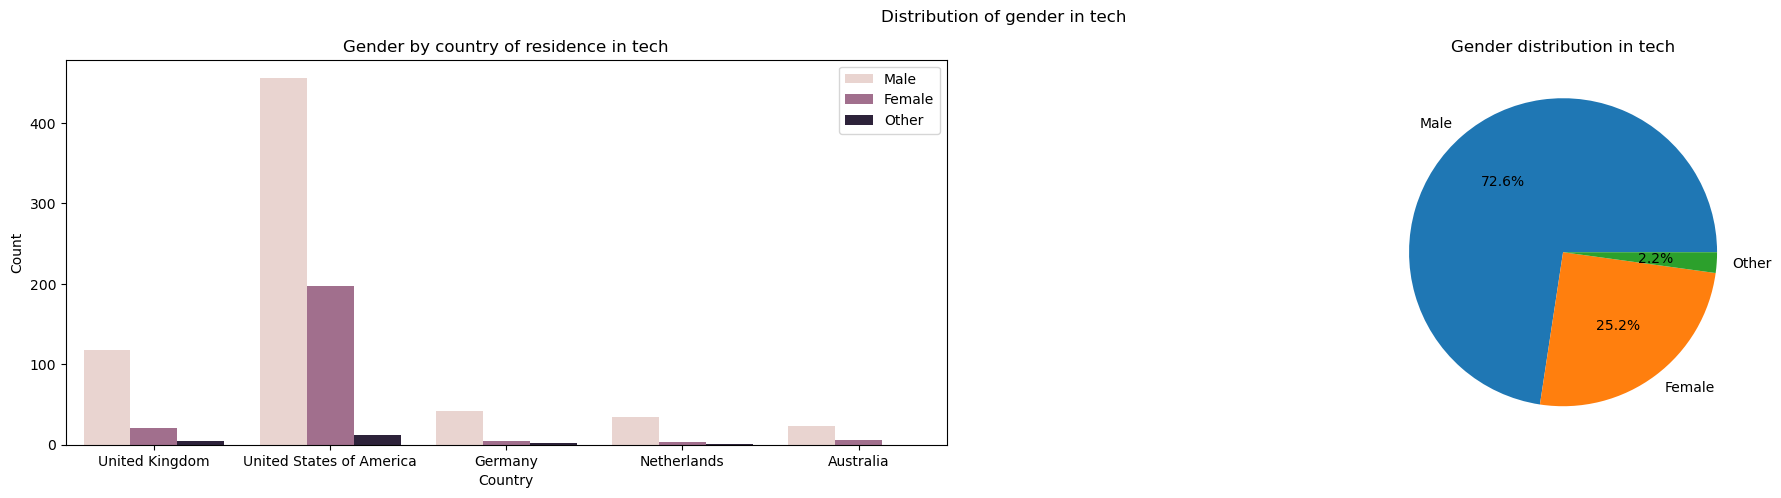

In [18]:
# Filter the DataFrame
tech_survey_df = survey_df[survey_df['employer_is_tech'] == True]

# Gender
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(20,10))
fig.set_figheight(5)
fig.set_figwidth(25)
fig.suptitle('Distribution of gender in tech')

sns.countplot(x="country_of_residence", hue="gender", data=tech_survey_df, ax=ax1)
ax1.set_title('Gender by country of residence in tech')
ax1.set_xlabel('Country')
ax1.set_ylabel('Count')
ax1.legend(['Male', 'Female', 'Other'])

gender_counts = tech_survey_df['gender'].value_counts()
ax2.pie(gender_counts, labels=['Male', 'Female', 'Other'], autopct='%1.1f%%')
ax2.set_title('Gender distribution in tech')

plt.show()

<Axes: title={'center': 'Age distribution in tech'}, xlabel='Age', ylabel='Count'>

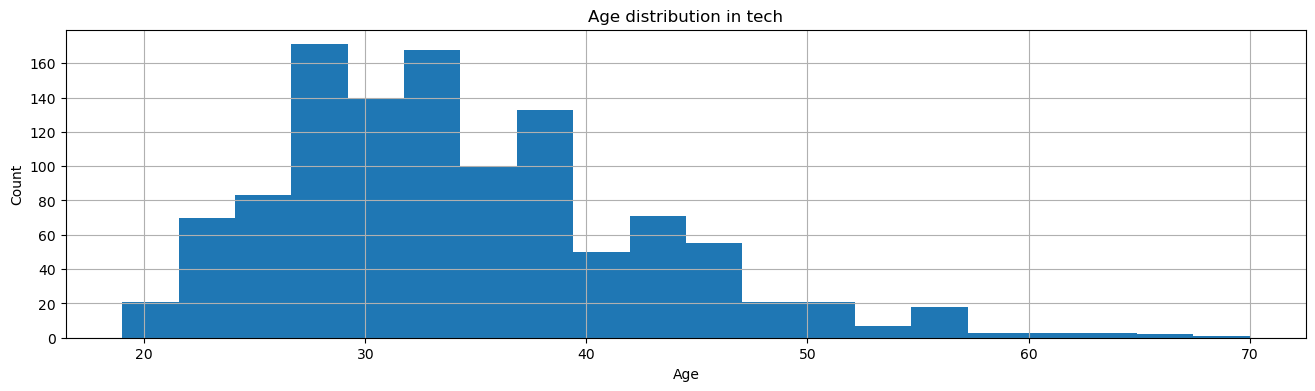

In [19]:
plt.figure(figsize=(16,4))
plt.title('Age distribution in tech')
plt.xlabel('Age')
plt.ylabel('Count')
survey_df[survey_df['role_related_to_tech'] == True]['age'].hist(bins=20)

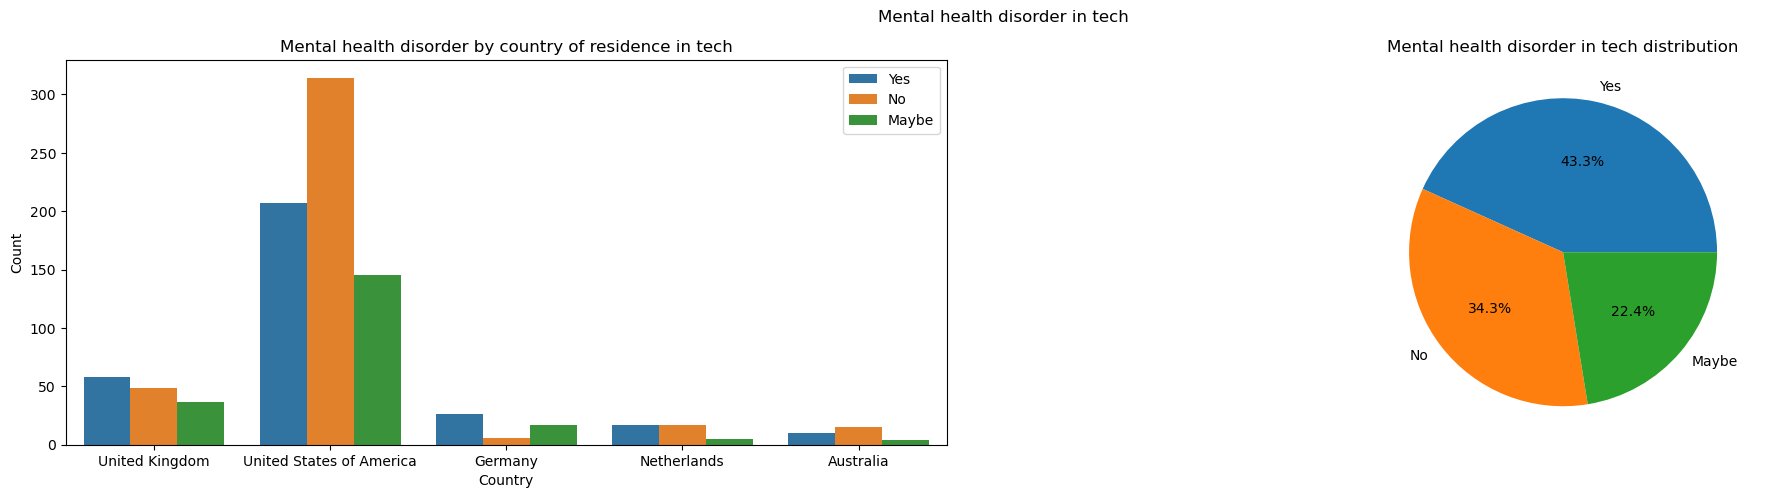

In [20]:
# Mental health disorder in tech (by country), and pie chart
tech_survey_df = survey_df[survey_df['employer_is_tech'] == True]

fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(20,10))
fig.set_figheight(5)
fig.set_figwidth(25)
fig.suptitle('Mental health disorder in tech')

sns.countplot(x="country_of_residence", hue="current_mental_health_disorder", data=tech_survey_df, ax=ax1)
ax1.set_title('Mental health disorder by country of residence in tech')
ax1.set_xlabel('Country')
ax1.set_ylabel('Count')
ax1.legend(['Yes', 'No', 'Maybe'])

mental_health_counts = tech_survey_df['current_mental_health_disorder'].value_counts()
ax2.pie(mental_health_counts, labels=['Yes', 'No', 'Maybe'], autopct='%1.1f%%')
ax2.set_title('Mental health disorder in tech distribution')

plt.show()

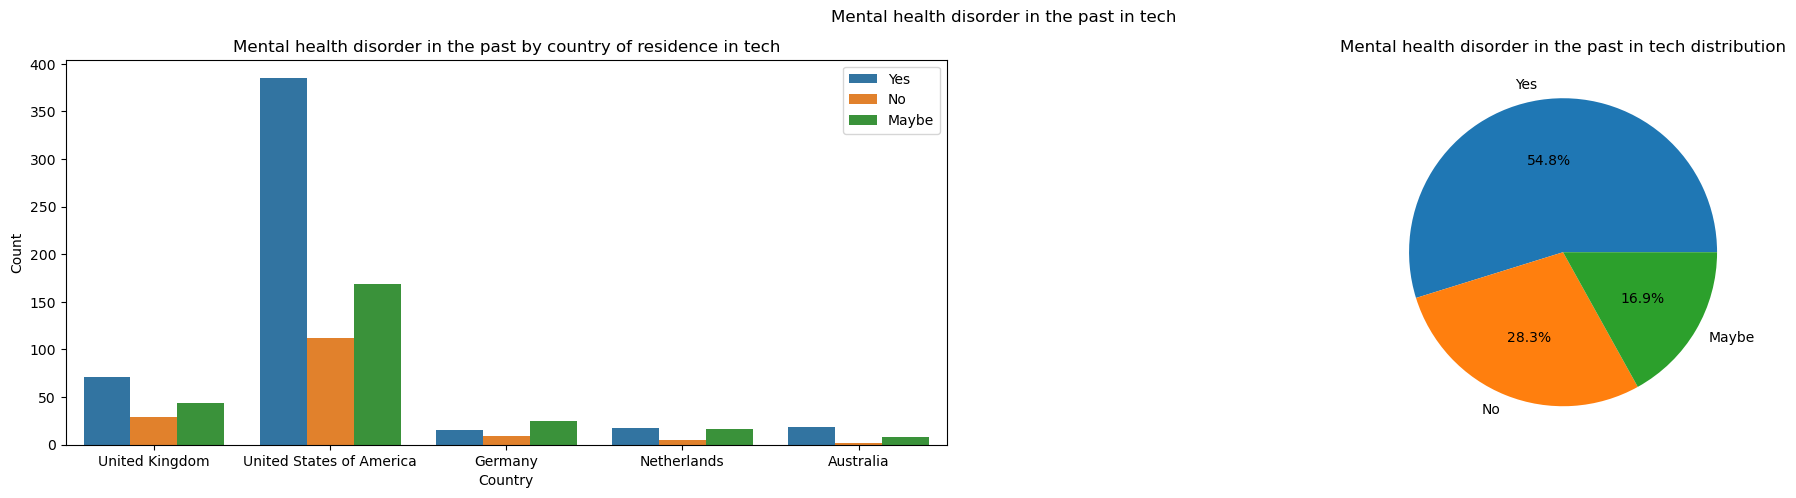

In [21]:
# Mental health disorder in the past in tech (by country), and pie chart
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(20,10))
fig.set_figheight(5)
fig.set_figwidth(25)
fig.suptitle('Mental health disorder in the past in tech')

sns.countplot(x="country_of_residence", hue="past_mental_health_disorder", data=tech_survey_df, ax=ax1)
ax1.set_title('Mental health disorder in the past by country of residence in tech')
ax1.set_xlabel('Country')
ax1.set_ylabel('Count')
ax1.legend(['Yes', 'No', 'Maybe'])

mental_health_counts = tech_survey_df['past_mental_health_disorder'].value_counts()
ax2.pie(mental_health_counts, labels=['Yes', 'No', 'Maybe'], autopct='%1.1f%%')
ax2.set_title('Mental health disorder in the past in tech distribution')

plt.show()

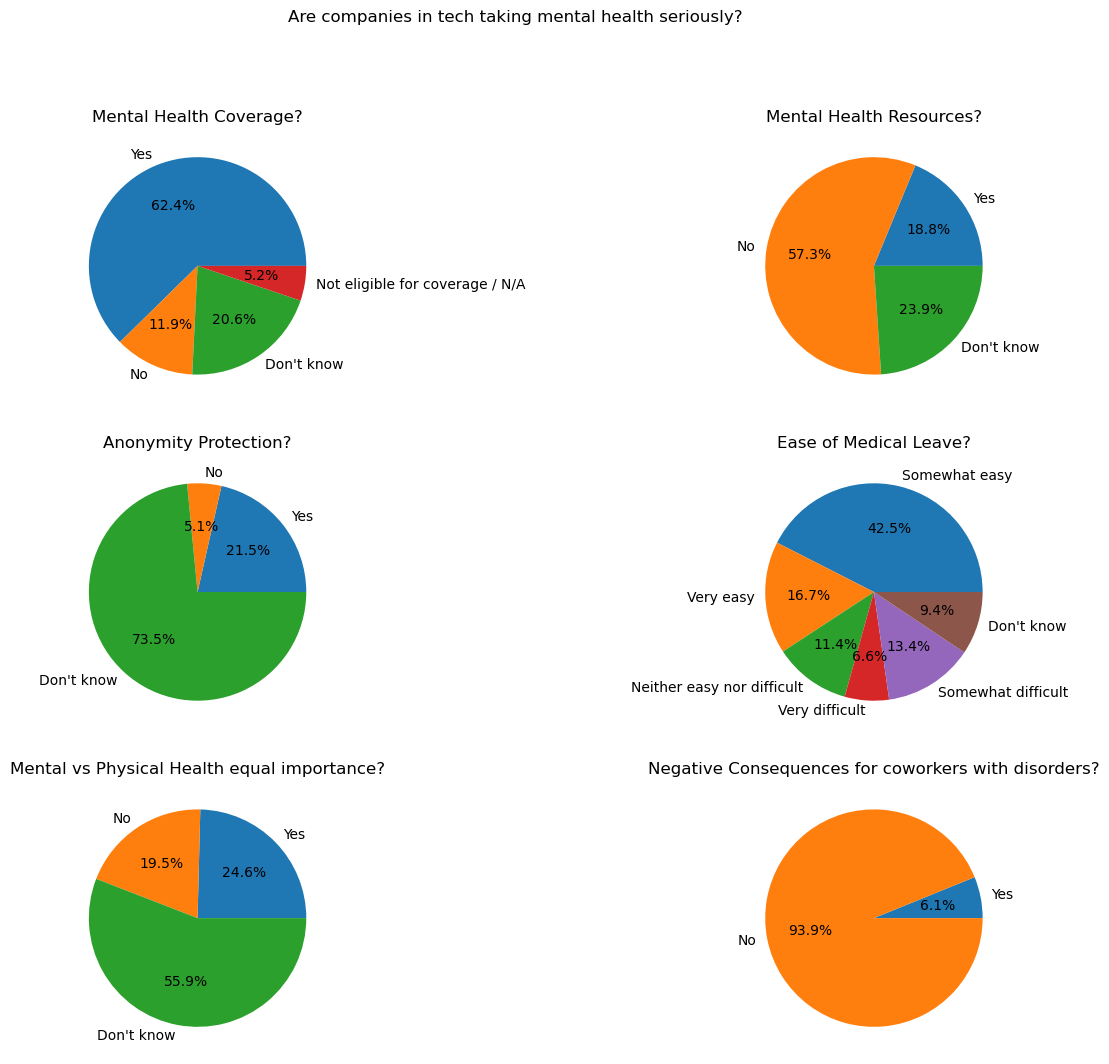

In [22]:
fig, ax = fig, ax = plt.subplots(figsize = (16, 12), ncols=2, nrows=3)
plt.suptitle('Are companies in tech taking mental health seriously?')

# Does your employer provide mental health benefits as part of healthcare coverage?
_yes = tech_survey_df[tech_survey_df['employer_mental_health_benefits'] == 'Yes']
_no = tech_survey_df[tech_survey_df['employer_mental_health_benefits'] == 'No']
_dont_know = tech_survey_df[tech_survey_df['employer_mental_health_benefits'] == 'I don\'t know']
_not_eligable = tech_survey_df[tech_survey_df['employer_mental_health_benefits'] == 'Not eligible for coverage / N/A']

ax[0,0].pie([len(_yes), len(_no), len(_dont_know), len(_not_eligable)], labels=['Yes', 'No', 'Don\'t know', 'Not eligible for coverage / N/A'], autopct='%1.1f%%')
ax[0,0].set_title('Mental Health Coverage?')

# Does your employer offer resources to learn more about mental health concerns and options for seeking help?
_yes = tech_survey_df[tech_survey_df['employer_mental_health_resources'] == 'Yes']
_no = tech_survey_df[tech_survey_df['employer_mental_health_resources'] == 'No']
_dont_know = tech_survey_df[tech_survey_df['employer_mental_health_resources'] == 'I don\'t know']

ax[0,1].pie([len(_yes), len(_no), len(_dont_know)], labels=['Yes', 'No', 'Don\'t know'], autopct='%1.1f%%')
ax[0,1].set_title('Mental Health Resources?')

# Is your anonymity protected if you choose to take advantage of mental health or substance abuse treatment resources with current employers?
_yes = tech_survey_df[tech_survey_df['anonymity_protection'] == 'Yes']
_no = tech_survey_df[tech_survey_df['anonymity_protection'] == 'No']
_dont_know = tech_survey_df[tech_survey_df['anonymity_protection'] == 'I don\'t know']

ax[1,0].pie([len(_yes), len(_no), len(_dont_know)], labels=['Yes', 'No', 'Don\'t know'], autopct='%1.1f%%')
ax[1,0].set_title('Anonymity Protection?')

# If a mental health issue prompted you to request a medical leave from work, asking for that leave would be:
_easy = tech_survey_df[tech_survey_df['ease_of_medical_leave_for_mental_health'] == 'Somewhat easy']
_very_easy = tech_survey_df[tech_survey_df['ease_of_medical_leave_for_mental_health'] == 'Very easy']
_neutral = tech_survey_df[tech_survey_df['ease_of_medical_leave_for_mental_health'] == 'Neither easy nor difficult']
_very_difficult = tech_survey_df[tech_survey_df['ease_of_medical_leave_for_mental_health'] == 'Very difficult']
_somewhat_difficult = tech_survey_df[tech_survey_df['ease_of_medical_leave_for_mental_health'] == 'Somewhat difficult']
_dont_know = tech_survey_df[tech_survey_df['ease_of_medical_leave_for_mental_health'] == 'I don\'t know']

ax[1,1].pie([len(_easy), len(_very_easy), len(_neutral), len(_very_difficult), len(_somewhat_difficult), len(_dont_know)], labels=['Somewhat easy', 'Very easy', 'Neither easy nor difficult', 'Very difficult', 'Somewhat difficult', 'Don\'t know'], autopct='%1.1f%%')
ax[1,1].set_title('Ease of Medical Leave?')

# Does employer take mental health as seriously as physical health?
_yes = tech_survey_df[tech_survey_df['employer_seriousness_mental_vs_physical'] == 'Yes']
_no = tech_survey_df[tech_survey_df['employer_seriousness_mental_vs_physical'] == 'No']
_dont_know = tech_survey_df[tech_survey_df['employer_seriousness_mental_vs_physical'] == 'I don\'t know']

ax[2,0].pie([len(_yes), len(_no), len(_dont_know)], labels=['Yes', 'No', 'Don\'t know'], autopct='%1.1f%%')
ax[2,0].set_title('Mental vs Physical Health equal importance?')

# Have you heard of or observed negative consequences for co-workers who have been open about mental health issues in your workplace?
_yes = tech_survey_df[tech_survey_df['observed_consequences_mental_health'] == 'Yes']
_no = tech_survey_df[tech_survey_df['observed_consequences_mental_health'] == 'No']

ax[2,1].pie([len(_yes), len(_no)], labels=['Yes', 'No'], autopct='%1.1f%%')
ax[2,1].set_title('Negative Consequences for coworkers with disorders?')

plt.show()

In [23]:
tech_survey_df['identified_as_mental_health_risk_to_career'].unique()

array(['Maybe', "No, I don't think it would", 'Yes, I think it would',
       'No, it has not', 'Yes, it has'], dtype=object)

Text(0.5, 1.0, 'Would my coworkers view me more negatively if they knew I had a mental health disorder?')

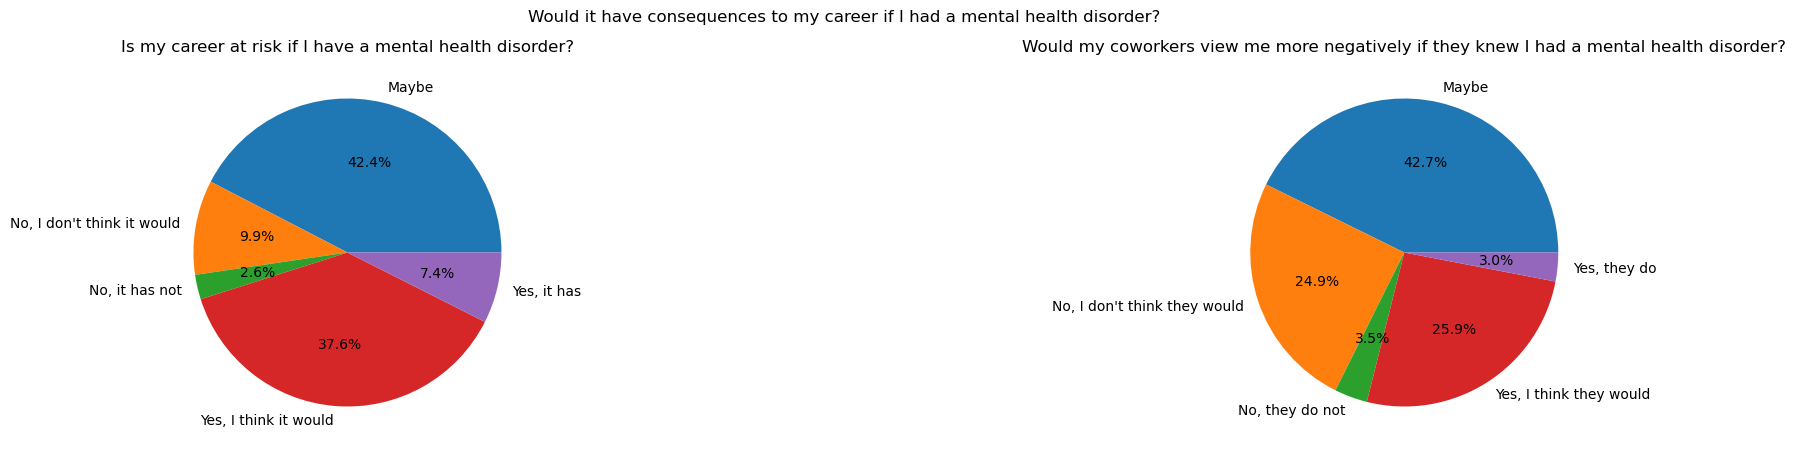

In [24]:
# Would it have consequences to my career if I had a mental health disorder?
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(20,10))
fig.set_figheight(5)
fig.set_figwidth(25)
fig.suptitle('Would it have consequences to my career if I had a mental health disorder?')

# Do you feel that being identified as a person with a mental health issue would hurt your career?
_maybe = tech_survey_df[tech_survey_df['identified_as_mental_health_risk_to_career'] == 'Maybe']
_no = tech_survey_df[tech_survey_df['identified_as_mental_health_risk_to_career'] == 'No, I don\'t think it would'] 
_no2 = tech_survey_df[tech_survey_df['identified_as_mental_health_risk_to_career'] == 'No, it has not']
_yes = tech_survey_df[tech_survey_df['identified_as_mental_health_risk_to_career'] == 'Yes, I think it would']
_yes2 = tech_survey_df[tech_survey_df['identified_as_mental_health_risk_to_career'] == 'Yes, it has']

ax1.pie([len(_maybe), len(_no), len(_no2), len(_yes), len(_yes2)], labels=['Maybe', 'No, I don\'t think it would', 'No, it has not', 'Yes, I think it would', 'Yes, it has'], autopct='%1.1f%%')
ax1.set_title('Is my career at risk if I have a mental health disorder?')

# Do you think that team members/co-workers would view you more negatively if they knew you suffered from a mental health issue?
_maybe = tech_survey_df[tech_survey_df['coworker_view_on_mental_health_disclosure'] == 'Maybe']
_no = tech_survey_df[tech_survey_df['coworker_view_on_mental_health_disclosure'] == 'No, I don\'t think they would']
_no2 = tech_survey_df[tech_survey_df['coworker_view_on_mental_health_disclosure'] == 'No, they do not']
_yes = tech_survey_df[tech_survey_df['coworker_view_on_mental_health_disclosure'] == 'Yes, I think they would']
_yes2 = tech_survey_df[tech_survey_df['coworker_view_on_mental_health_disclosure'] == 'Yes, they do']

ax2.pie([len(_maybe), len(_no), len(_no2), len(_yes), len(_yes2)], labels=['Maybe', 'No, I don\'t think they would', 'No, they do not', 'Yes, I think they would', 'Yes, they do'], autopct='%1.1f%%')
ax2.set_title('Would my coworkers view me more negatively if they knew I had a mental health disorder?')

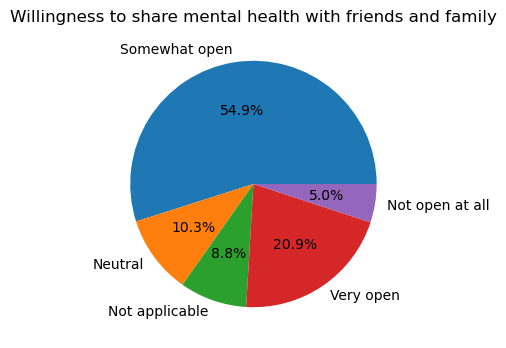

In [25]:
# How willing would you be to share with friends and family that you have a mental illness?
tech_survey_df['willingness_to_share_mental_health_with_friends_family'].unique()

_somewhat_willing = tech_survey_df[tech_survey_df['willingness_to_share_mental_health_with_friends_family'] == 'Somewhat open']
_neutral = tech_survey_df[tech_survey_df['willingness_to_share_mental_health_with_friends_family'] == 'Neutral']
_na = tech_survey_df[tech_survey_df['willingness_to_share_mental_health_with_friends_family'] == 'Not applicable to me (I do not have a mental illness)']
_very_willing = tech_survey_df[tech_survey_df['willingness_to_share_mental_health_with_friends_family'] == 'Very open']
_not_willing = tech_survey_df[tech_survey_df['willingness_to_share_mental_health_with_friends_family'] == 'Not open at all']

plt.figure(figsize=(16,4))
plt.title('Willingness to share mental health with friends and family')
plt.pie([len(_somewhat_willing), len(_neutral), len(_na), len(_very_willing), len(_not_willing)], labels=['Somewhat open', 'Neutral', 'Not applicable', 'Very open', 'Not open at all'], autopct='%1.1f%%')

plt.show()

## III. Machine Learning, Modeling, and Prediction

In [26]:
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import SGDClassifier, LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier

from sklearn.metrics import confusion_matrix, accuracy_score, roc_auc_score, roc_curve
from sklearn import preprocessing

In [30]:
from sklearn.model_selection import train_test_split

model_data = survey_prepared_df.copy()
# Assuming 'current_mental_health_disorder' is a categorical variable that has been label-encoded

# 'current_mental_health_disorder' is your target variable
y = model_data['current_mental_health_disorder']

# Drop the target variable from the feature set
X = model_data.drop('current_mental_health_disorder', axis=1)

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [31]:
def test_model(model, name='Default'):
    model.fit(X_train, y_train)
    predictions = model.predict(X_test)

    print(f'--- {name} ---')
    print(f'{confusion_matrix(y_test, predictions)}\nAccuracy: {round(accuracy_score(y_test, predictions), 4)}\n')

In [32]:
# Gaussian Naive Bayes
nb = GaussianNB(var_smoothing=1e-09)

# Stochastic Gradient Descent
sgd = SGDClassifier(max_iter=5000, tol=1e-3)

# Logistic Regression
logistic = LogisticRegression(C=1.0, penalty='l2', max_iter=5000)

# Decision Tree
tree = DecisionTreeClassifier()

# Random Forest
forest = RandomForestClassifier(n_estimators=100, max_depth=10)

# Support Vector Classifier
svc = SVC(C=1.0, kernel='rbf', gamma='scale')

test_model(nb, 'Gaussian Naive Bayes')
test_model(sgd, 'Stochastic Gradient Descent')
test_model(logistic, 'Logistic Regression')
# test_model(knn, 'K-Nearest Neighbors')
test_model(tree, 'Decision Tree')
test_model(forest, 'Random Forest')
test_model(svc, 'Support Vector Classifier')

--- Gaussian Naive Bayes ---
[[ 55  12   1]
 [  5  95   7]
 [  0   7 104]]
Accuracy: 0.8881

--- Stochastic Gradient Descent ---
[[ 59   0   9]
 [ 71  22  14]
 [  6   3 102]]
Accuracy: 0.6399



c:\Users\stanb\miniconda3\envs\hcaid\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


--- Logistic Regression ---
[[ 50  15   3]
 [ 12  90   5]
 [  4   7 100]]
Accuracy: 0.8392

--- Decision Tree ---
[[ 59   8   1]
 [ 14  86   7]
 [  2   7 102]]
Accuracy: 0.8636

--- Random Forest ---
[[ 54   6   8]
 [  7  90  10]
 [  3   2 106]]
Accuracy: 0.8741

--- Support Vector Classifier ---
[[ 0 58 10]
 [ 0 92 15]
 [ 0 13 98]]
Accuracy: 0.6643



In [33]:
# Hyperparameter tuning for Random Forest
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [10, 20, 30]
}

grid_search = GridSearchCV(estimator=forest, param_grid=param_grid, cv=5, n_jobs=-1, verbose=3)
grid_search.fit(X_train, y_train)

print(grid_search.best_params_)
print(grid_search.best_score_)
print(grid_search.best_estimator_)
print(grid_search.best_estimator_.feature_importances_)

Fitting 5 folds for each of 9 candidates, totalling 45 fits
{'max_depth': 30, 'n_estimators': 200}
0.894916877346204
RandomForestClassifier(max_depth=30, n_estimators=200)
[0.0045488  0.00501608 0.00615584 0.00603487 0.00169903 0.0062784
 0.0061651  0.00907085 0.01018132 0.00896777 0.00405456 0.00782644
 0.05099592 0.13053494 0.05142755 0.00442873 0.00586243 0.00523395
 0.00602418 0.01153342 0.00496603 0.0028201  0.00690912 0.00522682
 0.00605741 0.00477021 0.00536008 0.01523635 0.00452921 0.00174139
 0.00892051 0.00680196 0.00204834 0.00143376 0.00707781 0.00606121
 0.01036859 0.00150519 0.00452454 0.07846319 0.00147136 0.00458759
 0.00782375 0.00413691 0.0066578  0.01929627 0.01725241 0.00571572
 0.00103416 0.00195655 0.02705104 0.14509065 0.01070611 0.01090578
 0.00475425 0.00588935 0.01529102 0.09768155 0.04623897 0.01622979
 0.00429208 0.01907491]


In [34]:
best_model = grid_search.best_estimator_
best_model.fit(X_train, y_train)
predictions = best_model.predict(X_test)

In [35]:
# Feature importances
feature_importances = pd.DataFrame(best_model.feature_importances_, index = X_train.columns, columns=['importance']).sort_values('importance', ascending=False)
feature_importances.head(20)

,importance
suspected_conditions,0.146874
diagnosed_conditions,0.123076
work_interference_when_not_treated,0.094423
past_mental_health_disorder,0.077929
diagnosed_by_professional,0.055659
diagnosed_conditions_by_professional,0.054000
work_interference_when_treated,0.046631
sought_mental_health_treatment,0.030904
reason_for_discussing_mental_health,0.019846
age,0.018665
